In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Cleaning

In [12]:
dataframe = pd.read_csv("final.csv")
dataframe['Entrance'].fillna("None", inplace=True)
dataframe.drop('index', axis=1, inplace=True)
dataframe.head()

,House Direction,Balcony Direction,Bedrooms,Toilets,Legits,Floors,Facade,Entrance,District,Ward,Street,Area,Price,X,Y
0,None,None,6,6,+đỏ,6,5.1,30.0,đống đa,ô chợ dừa,xã đàn,80.0,28000.0,21.024039,105.824232
1,None,None,6,4,+đỏ,5,4.6,None,hà đông,quang trung,quang trung,78.0,6100.0,20.969225,105.774632
2,None,None,4,3,+đỏ+hồng,4,5.0,None,hà đông,quang trung,quang trung,48.0,6200.0,20.969225,105.774632
3,None,None,4,3,+đỏ,4,4.0,None,hà đông,văn quán,None,43.0,3800.0,20.979725,105.790661
4,None,None,3,4,+đỏ+hồng,5,4.0,2.5,nam từ liêm,phú đô,lê quang đạo,35.0,4000.0,21.011045,105.767012


In [13]:
#Checking the missing values
dataframe.isnull().sum()

House Direction      0
Balcony Direction    0
Bedrooms             0
Toilets              0
Legits               0
Floors               0
Facade               0
Entrance             0
District             0
Ward                 1
Street               0
Area                 3
Price                0
X                    0
Y                    0
dtype: int64

In [14]:
dataframe['Area'].fillna(dataframe['Area'].mode()[0], inplace=True) # drop instead of mode value
dataframe['Ward'] = dataframe['Ward'].fillna('None')
dataframe['Street'] = dataframe['Street'].fillna('None')
dataframe.isnull().sum().max()

0

Consult

In [15]:
dataframe

,House Direction,Balcony Direction,Bedrooms,Toilets,Legits,Floors,Facade,Entrance,District,Ward,Street,Area,Price,X,Y
0,None,None,6,6,+đỏ,6,5.1,30.0,đống đa,ô chợ dừa,xã đàn,80.0,28000.0,21.024039,105.824232
1,None,None,6,4,+đỏ,5,4.6,None,hà đông,quang trung,quang trung,78.0,6100.0,20.969225,105.774632
2,None,None,4,3,+đỏ+hồng,4,5.0,None,hà đông,quang trung,quang trung,48.0,6200.0,20.969225,105.774632
3,None,None,4,3,+đỏ,4,4.0,None,hà đông,văn quán,None,43.0,3800.0,20.979725,105.790661
4,None,None,3,4,+đỏ+hồng,5,4.0,2.5,nam từ liêm,phú đô,lê quang đạo,35.0,4000.0,21.011045,105.767012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34951,None,None,4,None,+đỏ+hồng,4,3.0,None,thanh xuân,thượng đình,nguyễn trãi,54.0,48000.0,20.997660,105.812218
34952,None,None,4,None,+đỏ+hồng,5,3.0,None,thanh xuân,khương trung,khương trung,75.0,65000.0,20.999841,105.818591
34953,None,None,4,None,+đỏ+hồng,4,3.0,None,đống đa,láng hạ,láng,40.0,43000.0,21.014730,105.811772
34954,None,None,4,None,None,5,3.0,None,đống đa,cát linh,hào nam,42.0,76000.0,21.029292,105.830226


In [16]:
count = {"feature": [], "Number of None":[], 'percent':[]}
for col in dataframe.columns:
    count['feature'].append(col)
    if "None" in dataframe[col].values:
        count["Number of None"].append(dataframe[col].value_counts()["None"])
        count['percent'].append(round(dataframe[col].value_counts()["None"]/len(dataframe)*100, 2))
    else:
        count["Number of None"].append(0)
        count['percent'].append(0)

count = pd.DataFrame(data=count).sort_values(by='percent', ascending=False)
print("Number of data points:", len(dataframe))
print()
print(count)
# print("Number of data points:", len(dataframe))

Number of data points: 34956

              feature  Number of None  percent
1   Balcony Direction           33682    96.36
0     House Direction           30283    86.63
7            Entrance           27465    78.57
3             Toilets           26021    74.44
4              Legits           10050    28.75
2            Bedrooms            5468    15.64
10             Street            4426    12.66
5              Floors            4379    12.53
9                Ward            4054    11.60
6              Facade               0     0.00
8            District               0     0.00
11               Area               0     0.00
12              Price               0     0.00
13                  X               0     0.00
14                  Y               0     0.00


<ipython-input-16-caedabef2572>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "None" in dataframe[col].values:
<ipython-input-16-caedabef2572>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "None" in dataframe[col].values:


Univariate Analysis

Price

In [17]:
# dataframe['Price'].describe().astype(int)

/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


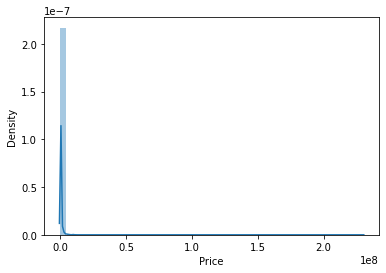

In [18]:
# histogram
sns.distplot(dataframe.Price);

1747.8000000000002
1731


/Users/tranxuanhuy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


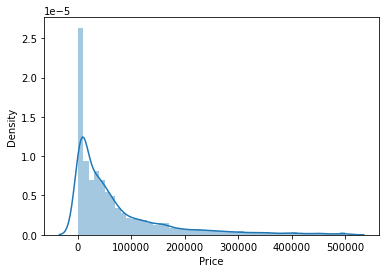

In [19]:
print(0.05 * len(dataframe))
print(len(dataframe[dataframe['Price']>0.5*1e6]))
dataframe.drop(dataframe[dataframe['Price']>0.5*1e6].index, inplace=True)# histogram
sns.distplot(dataframe.Price);